The purpose of this code is to predicte the **life expectancy** in a given country based on the features such as **GDP, population...** using **Linear Regression** method of **ML**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

In [3]:
# create a DataFrame
df = pd.read_csv('Life-Expectancy-Data.csv')

## EDA

In [4]:
df.shape

(2938, 22)

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [7]:
df.isnull().sum(axis=0)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
# deleting the null values
before_drop = df.shape[0]
df = df.dropna()
after_drop = df.shape[0]

In [9]:
print('rows before droping nulls:', before_drop)
print('rows after droping nulls:', after_drop)

rows before droping nulls: 2938
rows after droping nulls: 1649


In [10]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
Country                            1649 non-null object
Year                               1649 non-null int64
Status                             1649 non-null object
Life expectancy                    1649 non-null float64
Adult Mortality                    1649 non-null float64
infant deaths                      1649 non-null int64
Alcohol                            1649 non-null float64
percentage expenditure             1649 non-null float64
Hepatitis B                        1649 non-null float64
Measles                            1649 non-null int64
 BMI                               1649 non-null float64
under-five deaths                  1649 non-null int64
Polio                              1649 non-null float64
Total expenditure                  1649 non-null float64
Diphtheria                         1649 non-null float64
 HIV/AIDS                          1649 non-null

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
under-five deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03


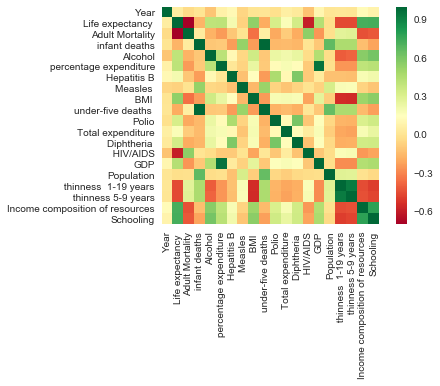

In [13]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

## Linear Regression just on feature GDP

In [14]:
y = df['Life expectancy '].values
X_gdp = df['GDP'].values

In [15]:
print('Dimension of y before reshaping: {}'.format(y.shape))
print('Dimension of X before reshaping: {}'.format(X_gdp.shape))

Dimension of y before reshaping: (1649,)
Dimension of X before reshaping: (1649,)


In [16]:
y = y.reshape(-1,1)
X_gdp = X_gdp.reshape(-1,1)

In [17]:
print('Dimension of y after reshaping: {}'.format(y.shape))
print('Dimension of X after reshaping: {}'.format(X_gdp.shape))

Dimension of y after reshaping: (1649, 1)
Dimension of X after reshaping: (1649, 1)


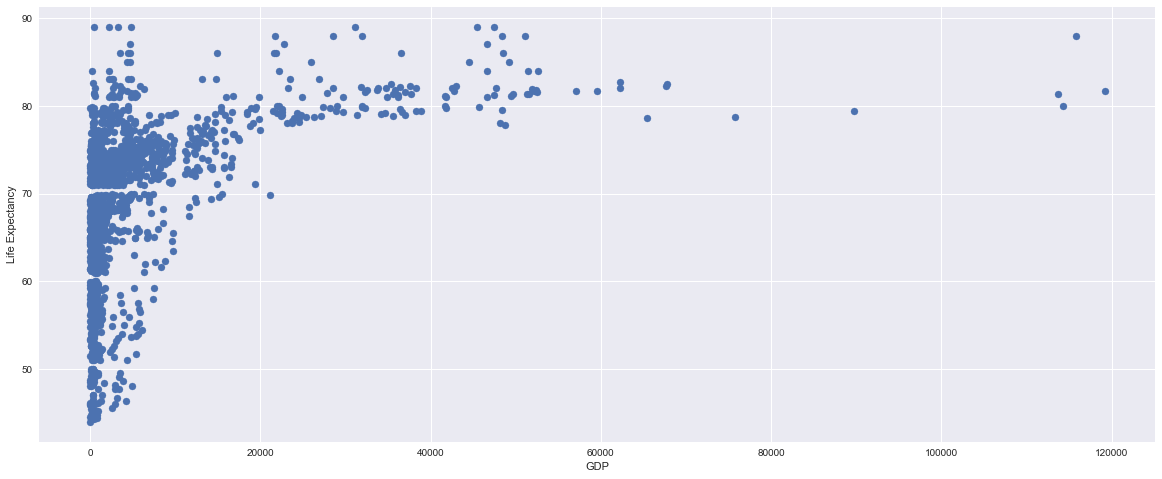

In [18]:
# scatter plot of y vs X_gdp
plt.figure(figsize=(20,8))
plt.scatter(X_gdp, y)

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [19]:
# create the model
ln_reg = LinearRegression()

In [20]:
# introduce the new X
prediction_space = np.linspace(min(X_gdp), max(X_gdp)).reshape(-1,1)

In [21]:
# fitting the data
ln_reg.fit(X_gdp, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# predicting the labels for new X
y_pred = ln_reg.predict(prediction_space)

In [23]:
# print R^2
print(ln_reg.score(prediction_space, y_pred))

1.0


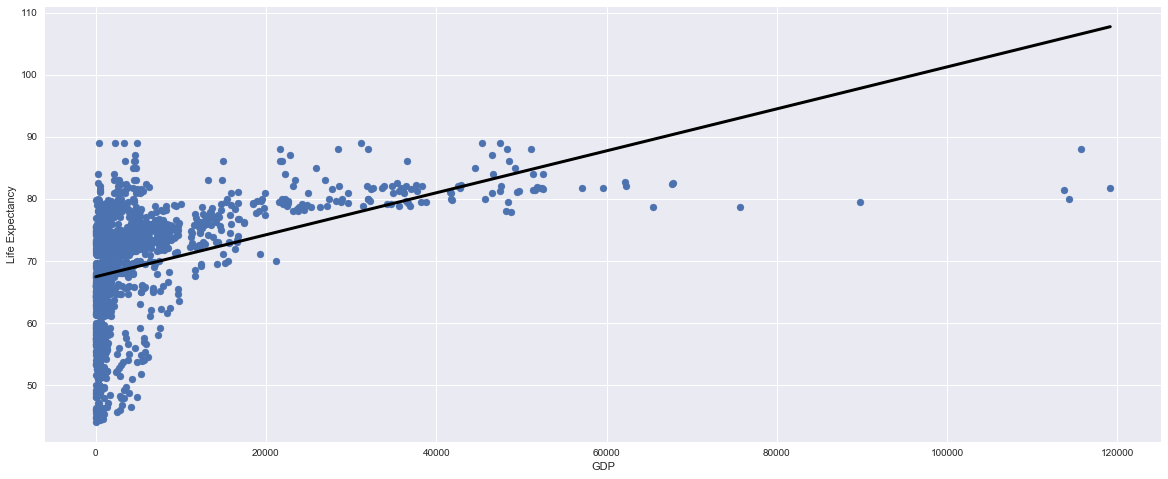

In [24]:
# plotting th eregression line on original data
plt.figure(figsize=(20,8))
plt.scatter(X_gdp, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

## Linear Regression on all features

In [25]:
# deleting the non numeric values
df = df.drop(['Country','Year','Status'], axis=1)

In [26]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [27]:
# labels(y) and data(X_all)
y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values

In [28]:
# splitting the data to train and test parts
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

In [29]:
# create the model
ln_reg_all = LinearRegression()

In [30]:
# fitting the model to the train data
ln_reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# predicting the data
y_pred = ln_reg_all.predict(X_test)

In [32]:
# accuracy
print('R^2: {}'.format(ln_reg_all.score(X_test, y_test)))
print('rmse: {}'.format(np.sqrt(mean_squared_error(y_pred, y_test))))

R^2: 0.8260950560447311
rmse: 3.706513589005533


## K-Fold Cross Validation Comparison

In [33]:
y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

In [35]:
cv_reg = LinearRegression()

In [36]:
cv_list = np.array([3,4,5,6,7,8,9])

for cv in cv_list:
    cv_scores = cross_val_score(cv_reg, X_all, y, cv=cv)
    print(cv_scores)
    print('Average ' + str(cv) + '-Fold CV Score is: {}'.format(np.mean(cv_scores)))
    print()

[0.82427072 0.82372506 0.78087243]
Average 3-Fold CV Score is: 0.8096227359752811

[0.8430908  0.74407898 0.82133086 0.77444936]
Average 4-Fold CV Score is: 0.7957375004031526

[0.83532928 0.77805879 0.83898485 0.70770205 0.78634137]
Average 5-Fold CV Score is: 0.789283269725891

[0.81735793 0.82143188 0.77577538 0.84463851 0.66140695 0.83198793]
Average 6-Fold CV Score is: 0.792099764643882

[0.80933202 0.86613602 0.75362869 0.83710821 0.75510939 0.77061355
 0.81228645]
Average 7-Fold CV Score is: 0.8006020481108839

[0.78342688 0.87973022 0.71515519 0.77379143 0.85760046 0.72701262
 0.76504128 0.80386685]
Average 8-Fold CV Score is: 0.7882031162540555

[0.79141407 0.85407169 0.69457591 0.80109074 0.8200655  0.79415007
 0.63193609 0.78059906 0.80506281]
Average 9-Fold CV Score is: 0.7747739921907815



## Regularization 1: Lasso
In this linear regression method the less important features are shrunk to 0 and only the most imprtant ones remain!

In [37]:
y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values

In [38]:
# create Lasso model
reg_lasso = Lasso(alpha=0.4, normalize=True)

In [39]:
reg_lasso.fit(X_all, y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
# finding the coefficionts of Lasso
lasso_coef = reg_lasso.fit(X_all, y).coef_
print(lasso_coef)

[-0. -0.  0.  0.  0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0.  0.]


In [41]:
# create a list of columns except of (Life expactancy)
df_columns = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

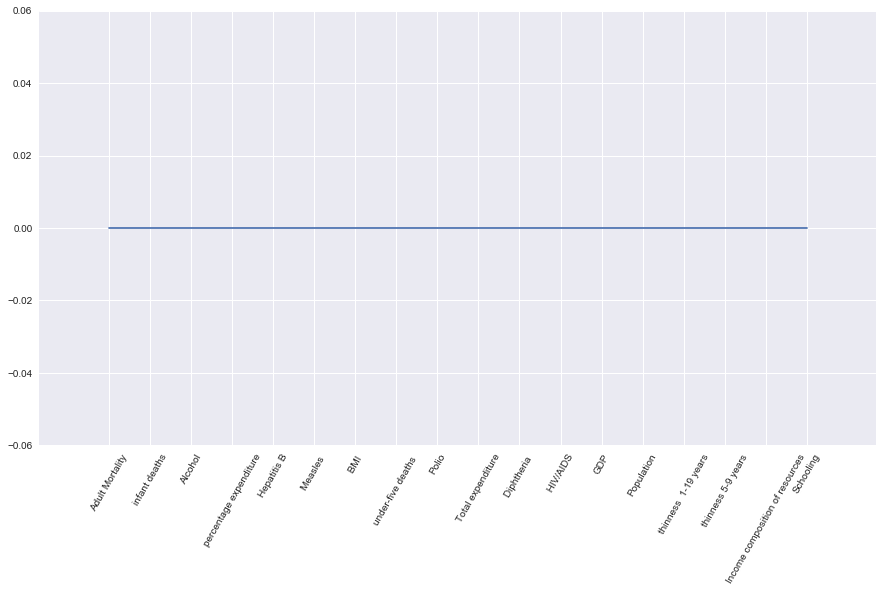

In [42]:
# ploting the Lasso coefficients
plt.figure(figsize=(15,8))
plt.plot(range(len(df_columns)), lasso_coef)

plt.xticks(range(len(df_columns)), df_columns, rotation=60)
plt.margins(0.1)
plt.show()

## Regularization 2: Ridge

In [50]:
# function for displaying plots
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    
    std_error = cv_scores_std / np.sqrt(10)
    
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='red')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [51]:
y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values

In [52]:
# list of alphas
alpha_space = np.logspace(-4,0,50)
ridge_scores = []
ridge_scores_std = []

In [53]:
# create Ridge regressor
ridge_reg = Ridge(normalize=True)

In [54]:
# itteration on different alphas
for alpha in alpha_space:
    ridge_reg.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge_reg, X_all, y, cv=10)
    
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

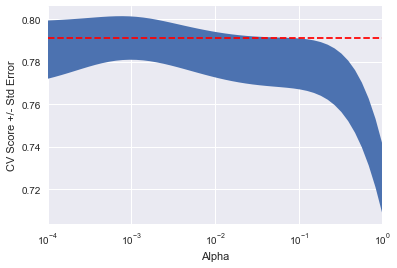

In [55]:
# display the plot
display_plot(ridge_scores, ridge_scores_std)